In [2]:
!pip install kneed

    100% |████████████████████████████████| 11.6MB 1.3MB/s eta 0:00:01
    100% |████████████████████████████████| 14.5MB 1.2MB/s eta 0:00:01
    100% |████████████████████████████████| 25.9MB 712kB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 6.3MB/s eta 0:00:01
    100% |████████████████████████████████| 163kB 6.9MB/s eta 0:00:01
    100% |████████████████████████████████| 2.2MB 4.3MB/s eta 0:00:01
    100% |████████████████████████████████| 235kB 6.8MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 5.5MB/s eta 0:00:01
tensorflow 1.13.1 requires tensorboard<1.14.0,>=1.13.0, which is not installed.
pytest-astropy 0.8.0 requires pytest-cov>=2.0, which is not installed.
pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.
pytest-doctestplus 0.7.0 has requirement pytest>=4.0, but you'll have pytest 3.10.1 which is incompatible.
pytest-astropy 0.8.0 has requirement pytest>=4.6, but you'll have pytest 3.10.1 which is incompa

 cluster count is 4


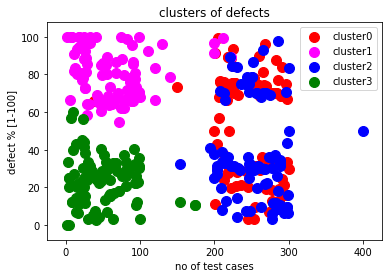

NameError: name 'project' is not defined

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from project_lib import Project
import types
from botocore.client import Config
import ibm_boto3
import ibmos2spark
import types
import pandas as pd




def __iter__(self): return 0




dataset_csv = pd.read_csv(body)
cluster_df=dataset_csv[['Module_id','No_of_requirements','No_of_lines_of_code','Hours_spent','No_of_test_cases','No_of_defects']]
def calculate_percentage(row):
     d=row['No_of_defects']/row['No_of_test_cases']
     return d*100

cluster_df['defect_percent']=cluster_df.apply(lambda row : calculate_percentage(row),axis=1)
cluster_df.drop(['No_of_defects'],axis=1,inplace=True)
X=cluster_df.iloc[:,1:].values


scaler = StandardScaler()
X=scaler.fit_transform(X)


def calculate_nclusters():
    cluster_errors=[]
    cluster_range = range(1, 10)
    for i in cluster_range:
        kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
        kmeans.fit(X)
        cluster_errors.append(kmeans.inertia_)

    clusters_df = pd.DataFrame({"cluster_errors": cluster_errors, "num_clusters": cluster_range})
    elbow = KneeLocator(clusters_df.num_clusters.values, clusters_df.cluster_errors.values, S=1.0, curve='convex', direction='decreasing')
    return elbow.knee


cluster_count=calculate_nclusters()
print(" cluster count is {}".format(cluster_count))
kmeans=KMeans(n_clusters=cluster_count,init='k-means++',random_state=42)
#kmeans=AgglomerativeClustering(n_clusters=cluster_count,affinity='euclidean',linkage='ward')
y_means=kmeans.fit_predict(X)
X=scaler.inverse_transform(X)

colors=['red','magenta','blue','green','violet','black','yellow','orange','cyan']

for i in range(cluster_count):
    plt.scatter(X[y_means==i,3],X[y_means==i,4],s=100,c=colors[i],label='cluster{}'.format(i))


#plt.scatter(kmeans.cluster_centers_[:,3],kmeans.cluster_centers_[:,4],s=300,c='yellow',label='centroids')
plt.title('clusters of defects')
plt.xlabel('no of test cases')
plt.ylabel('defect % [1-100]')
plt.legend()
plt.show()

cluster_df['cluster']=y_means
#cluster_df.to_csv('cluster_output.csv', index = False)
project.save_data(file_name = "cluster_output.csv",data = cluster_df.to_csv(index=False),overwrite=True)